# 第 3 章　使用 Pyhton 进行数据分析｜用 Python 动手学统计学

## 第 6 节　正态分布及其应用

### 1. 导入函数库

In [1]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

### 2. 实现：概率密度

In [2]:
# 圆周率
np.pi

3.142

In [3]:
# 指数函数
np.exp(1)

np.float64(2.718281828459045)

In [4]:
# 均值为 4 标准差为 0.8 的正态分布在随机变量为 3 时的概率密度
x = 3
mu = 4
sigma = 0.8

1 / (np.sqrt(2 * np.pi * sigma**2)) * \
    np.exp(- ((x - mu)**2) / (2 * sigma**2))

np.float64(0.22831135673627742)

In [5]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

np.float64(0.2283113567362774)

In [6]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

np.float64(0.2283113567362774)

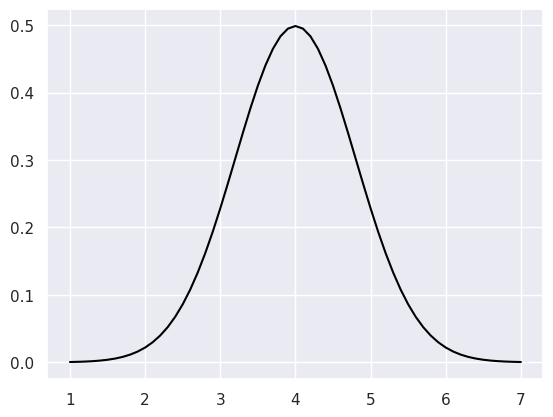

In [7]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot,
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

### 3. 样本小于等于某值的比例

In [8]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [9]:
np.sum(simulated_sample <= 3)

np.int64(10371)

In [10]:
np.sum(simulated_sample <= 3) / len(simulated_sample)

np.float64(0.10371)

### 5. 实现：累积分布函数

In [11]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

np.float64(0.10564977366685535)

In [12]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

np.float64(0.5)

### 7. 实现：百分位数

In [13]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

np.float64(2.4320288123679563)

In [14]:
left = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = left)

np.float64(3.0000000000000004)

In [15]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

np.float64(4.0)

### 10. t 值的样本分布

In [16]:
# 随机数种子
np.random.seed(1)
# 存放 t 值的空间
t_value_array = np.zeros(10000)
# 实例化一个正态分布
norm_dist = stats.norm(loc = 4, scale = 0.8)
# 开始实验
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

/tmp/ipython-input-3022100276.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_value_array, color = 'black')


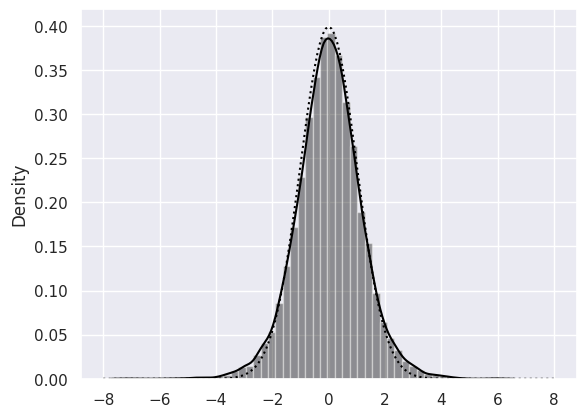

In [17]:
# t 值的直方图
sns.distplot(t_value_array, color = 'black')

# 标准正态分布的概率祺
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x),
         color = 'black', linestyle = 'dotted')

### 12. 实现：t 分布

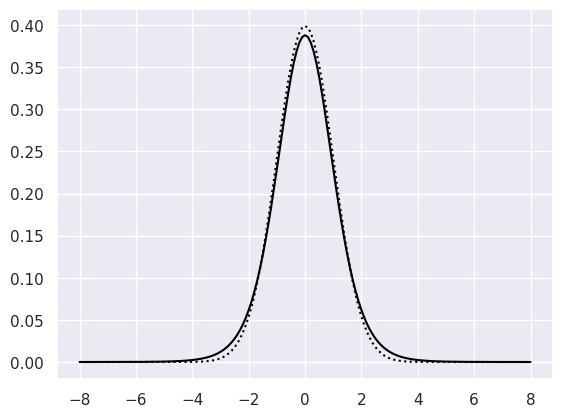

In [18]:
plt.plot(x, stats.norm.pdf(x = x),
         color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9),
         color = 'black')

/tmp/ipython-input-2975951891.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_value_array,


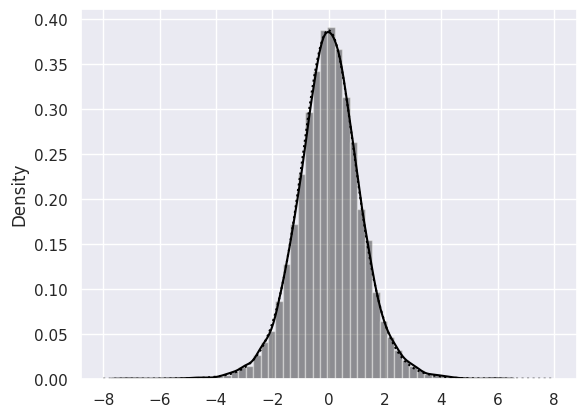

In [19]:
sns.distplot(t_value_array,
             color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9),
         color = 'black', linestyle = 'dotted')